<center>
<img src="https://1000logos.net/wp-content/uploads/2016/10/American-Express-Color.png" alt="American Express Logo" width="300" height="150">
</center>

**American Express Company** is an American bank holding company and multinational financial services corporation that **specializes in payment cards**.

**Objective of the Project**
* Cleanse the data set
* Conduct Individual analysis of each attribute to tabulise and visualise
* Interlink with external data sets of Govt , NGO's to forecast on business
*Utilise Machine Learning to obtain accurate models on customer exit Prediction

**Sources of DataSets** : Unstop(American Express)<br>
**External Datasets**:RBI Portal(Regionwise credit scores),MoSPI Portal(Periodic Labour Force Survey)<br>
**Type of Project** : Real World Project

**Data Analyst Profile** <br>
[Linkedin](https://www.linkedin.com/in/sreehari-sundaran-43bb4b3b/) <br>
[Git Hub](https://github.com/Sreehari-Sundaran/Project_Portfolio)

## CONTENTS
- **Importing the Libraries**
- **Importing Dataset**
- **Handling Missing Data**
- **Data Analysis**(Tabulation followed by Visualisation)
- **ANALYSIS OF CREDIT SCORE**
  - Interlinkage of Credit Score Analysis with **Government Periodic Labour Force Survey 2022**
- **ANALYSIS OF AGE**
  - Interlinking Age Analysis with **Ministry of Statistics 'Demography of India over the Years Visualisation**'
- **Analysis of Geographical Location**
  - Interlinking Geographical Location Analysis with **RBI Region Wise Credit Statistics**
  - Credit Score Analysis by Geographical Location
- **Analysis by Gender**
  - Credit Score Analysis by Gender
- **Analysis of UPI Status of Customers**
  - UPI Usage Based on Gender
- **Analysis of Income Range**
- **Analysis of Current Account of Customers**
- **Analysis of Closed Account of Customers**
  - Customer Churn Rate
- **Credit Score Analysis by Geographical Location**
- **Identifying the Outliers**
- **HeatMap of Geographical Location with popup containing Average Credit Score**
- **Machine Learning to Obtain User Exit Prediction**
 - Analysis of Feature Importance of **Gradient Boosting**
 -**Conclusion(in brief)**





## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing Dataset

In [ ]:
df=pd.read_csv("/content/Dataset_master(American Express User Exit Pred).csv")

In [ ]:
df.head(10)

,Credit Score,Geography,Gender,Age,Customer Since,Current Account,Num of products,UPI Enabled,Estimated Yearly Income,Closed
0,553.0,Delhi,Female,45.0,4.0,0.000,4.0,1.0,274150.0,0.0
1,447.0,Bengaluru,Male,31.0,7.0,0.000,4.0,1.0,519360.0,0.0
2,501.0,Delhi,Female,32.0,2.0,0.000,4.0,1.0,545501.0,0.0
3,428.0,Delhi,Male,51.0,3.0,0.000,4.0,1.0,86868.0,0.0
4,492.0,Delhi,Female,57.0,6.0,1912681.501,2.0,1.0,518680.0,0.0
5,649.0,Mumbai,Male,61.0,4.0,1739005.126,2.0,1.0,86816.0,1.0
6,624.0,Mumbai,Male,54.0,6.0,1741981.923,4.0,1.0,72959.0,1.0
7,510.0,Bengaluru,Male,74.0,8.0,0.000,4.0,1.0,295115.0,0.0
8,573.0,Mumbai,Male,45.0,8.0,1245561.866,4.0,1.0,471174.0,1.0
9,517.0,Delhi,Female,62.0,6.0,2210750.266,4.0,0.0,149488.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9929 entries, 0 to 9928
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Credit Score             9927 non-null   float64
 1   Geography                9927 non-null   object 
 2   Gender                   9927 non-null   object 
 3   Age                      9927 non-null   float64
 4   Customer Since           9927 non-null   float64
 5   Current Account          9927 non-null   float64
 6   Num of products          9927 non-null   float64
 7   UPI Enabled              9927 non-null   float64
 8   Estimated Yearly Income  9927 non-null   float64
 9   Closed                   9927 non-null   float64
dtypes: float64(8), object(2)
memory usage: 775.8+ KB





## Handling Missing Data

In [ ]:
df.isnull().sum()

,0
Credit Score,2
Geography,2
Gender,2
Age,2
Customer Since,2
Current Account,2
Num of products,2
UPI Enabled,2
Estimated Yearly Income,2
Closed,2


In [ ]:
null_rows = df[df['Credit Score'].isna() | df['Credit Score'].eq('')]

In [ ]:
df.isnull().sum()

,0
Credit Score,2
Geography,2
Gender,2
Age,2
Customer Since,2
Current Account,2
Num of products,2
UPI Enabled,2
Estimated Yearly Income,2
Closed,2


In [ ]:
df.loc[df['Credit Score'].isna(), 'Credit Score'] = 0

In [ ]:
df.isnull().sum()

,0
Credit Score,0
Geography,2
Gender,2
Age,2
Customer Since,2
Current Account,2
Num of products,2
UPI Enabled,2
Estimated Yearly Income,2
Closed,2


In [ ]:
null_geography=df[df['Geography'].isna() | df['Geography'].eq('')]
null_geography

,Credit Score,Geography,Gender,Age,Customer Since,Current Account,Num of products,UPI Enabled,Estimated Yearly Income,Closed
9927,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9928,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**OBSERVATIONS**


*   The last two entries of the data set has null values
*   As such an entry might not be possible in a bank data set with all columns posessing null values,those two rows will be removed



In [ ]:
df = df.drop([9927, 9928])

In [ ]:
print (df)

      Credit Score  Geography  Gender   Age  Customer Since  Current Account  \
0            553.0      Delhi  Female  45.0             4.0     0.000000e+00   
1            447.0  Bengaluru    Male  31.0             7.0     0.000000e+00   
2            501.0      Delhi  Female  32.0             2.0     0.000000e+00   
3            428.0      Delhi    Male  51.0             3.0     0.000000e+00   
4            492.0      Delhi  Female  57.0             6.0     1.912682e+06   
...            ...        ...     ...   ...             ...              ...   
9922         594.0  Bengaluru    Male  28.0             6.0     0.000000e+00   
9923         557.0  Bengaluru    Male  59.0             3.0     8.050490e+05   
9924         627.0     Mumbai  Female  42.0             4.0     1.893594e+06   
9925         600.0  Bengaluru  Female  51.0             0.0     9.031778e+05   
9926         553.0      Delhi    Male  75.0             7.0     0.000000e+00   

      Num of products  UPI Enabled  Est

In [ ]:
df.isnull().sum()

,0
Credit Score,0
Geography,0
Gender,0
Age,0
Customer Since,0
Current Account,0
Num of products,0
UPI Enabled,0
Estimated Yearly Income,0
Closed,0


**OBSERVATIONS**




*   On removal of last two rows ,the data set is now cleansed and is ready for further processing




# **Data Analysis** (*Tabulation followed by Visualisation*)

#  **ANALYSIS OF CREDIT SCORE**

# **Credit Score**<br>
A credit score is a 3-digit numeric summary of your credit history that represents your past credit behavior and how well you have managed your credit products

In [ ]:
bins = [0, 249, 299, 349, 399,449,499,549,599,649,699,749]
labels = ['<249', '250-299', '300-349', '350-399', '400-449','450-499','500-549','550-599','600-649','650-699','700-750']
creditscore_range= pd.cut(df['Credit Score'], bins=bins, labels=labels)

In [ ]:
creditscore_range_counts = creditscore_range.value_counts().sort_index()
creditscore_range_counts_df = pd.DataFrame({'Credit Score Range': creditscore_range_counts.index, 'Number of Customers': creditscore_range_counts.values})

**Tabulation of Credit Score**

In [ ]:
from tabulate import tabulate
print(tabulate(creditscore_range_counts_df, headers='keys', tablefmt='psql'))

+----+----------------------+-----------------------+
|    | Credit Score Range   |   Number of Customers |
|----+----------------------+-----------------------|
|  0 | <249                 |                     0 |
|  1 | 250-299              |                    11 |
|  2 | 300-349              |                    73 |
|  3 | 350-399              |                   428 |
|  4 | 400-449              |                  1136 |
|  5 | 450-499              |                  1854 |
|  6 | 500-549              |                  2358 |
|  7 | 550-599              |                  2119 |
|  8 | 600-649              |                  1286 |
|  9 | 650-699              |                   662 |
| 10 | 700-750              |                     0 |
+----+----------------------+-----------------------+


**Visualisation of Credit Score using histogram**

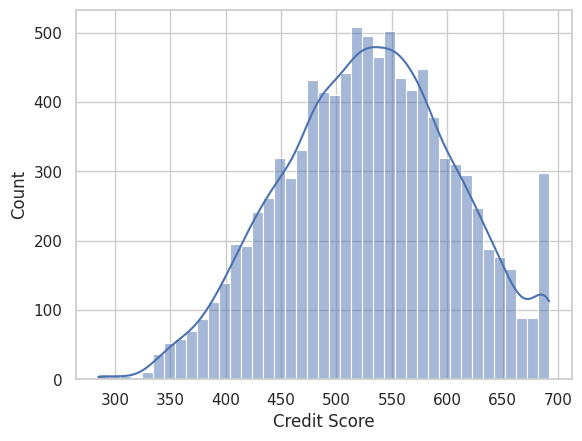

In [ ]:
sns.histplot(df['Credit Score'], kde=True)
plt.show()

**What is Credit Score Range?**


Credit scores are usually three-digit numbers that range from 300 to 850 and are generally categorized into five ranges:<br>Excellent: 800 to 850
<br>Very good: 740 to 799
<br>Good: 670 to 739
<br>Fair: 580 to 669
<br>Poor: 300 to 579





In [ ]:
bins = [0, 300, 579, 669, 739,799,849]
labels = ['<300', '300-579', '580-669', '670-739', '740-799','800-850']
descriptions = ['Very Poor', 'Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
creditscore_range= pd.cut(df['Credit Score'], bins=bins, labels=labels)

creditscore_range_counts = creditscore_range.value_counts().sort_index()
creditscore_range_counts_df = pd.DataFrame({'Description': descriptions,'Credit Score Range': creditscore_range_counts.index, 'Number of Customers': creditscore_range_counts.values})

In [ ]:
from tabulate import tabulate
print(tabulate(creditscore_range_counts_df, headers='keys', tablefmt='psql'))

+----+---------------+----------------------+-----------------------+
|    | Description   | Credit Score Range   |   Number of Customers |
|----+---------------+----------------------+-----------------------|
|  0 | Very Poor     | <300                 |                    11 |
|  1 | Poor          | 300-579              |                  7272 |
|  2 | Fair          | 580-669              |                  2229 |
|  3 | Good          | 670-739              |                   415 |
|  4 | Very Good     | 740-799              |                     0 |
|  5 | Excellent     | 800-850              |                     0 |
+----+---------------+----------------------+-----------------------+


**OBSERVATIONS ON CREDIT SCORE**
*   Most of Customer Lies in poor credit score Range followed by Fair Credit Score Range
*   The Aftermath of CoVID 19 as well as surge in disasters,skirmishes between nations have led to increase in inflation as well as cost of living
*   These may be the factors for increase in Number of customers with low credit score range
*   The Periodic Labour Force Survey may also have an impact on these values.Let us analyse the government data to obtain future predictions



# Interlinkage of Credit Score analysis with Government Periodic Labour Force Survey 2022

**IMPORTING Periodic Labour Force Survey Cleansed Data Set**

In [ ]:
plfs=pd.read_csv("/content/PLFS 2022(Sheet1) (1).csv")

In [ ]:
plfs.head()

,Year,Rural male,Rural female,Rural person,Urban male,Urban female,Urban person,(R+U)male,(R+U)female,(R+U)person
0,2022-23,2.7,1.8,2.4,4.7,7.5,5.4,3.3,2.9,3.2
1,2021-22,3.8,2.1,3.2,5.8,7.9,6.3,4.4,3.3,4.1
2,2020-21,3.8,2.1,3.3,6.1,8.6,6.7,4.5,3.5,4.2
3,2019-20,4.5,2.6,3.9,6.4,8.9,6.9,5.0,4.2,4.8
4,2018-19,5.5,3.5,5.0,7.0,9.8,7.6,6.0,5.1,5.8


As we are focused on three major Urban cities , We will focus on Unemployment status of Urban Person

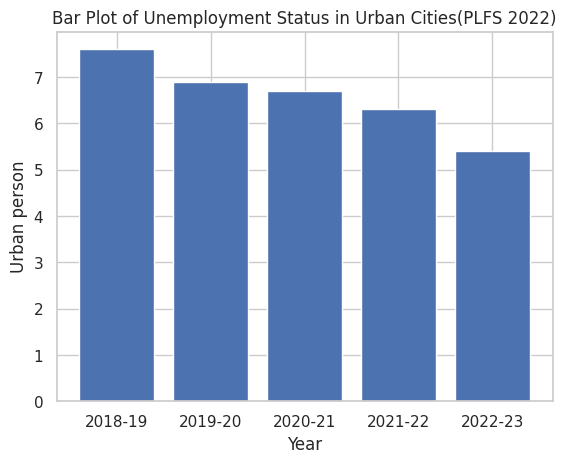

In [ ]:

plfs_sorted = plfs.sort_values(by='Year', ascending=True)

plt.bar(plfs_sorted['Year'], plfs_sorted['Urban person'])

plt.title('Bar Plot of Unemployment Status in Urban Cities(PLFS 2022)')
plt.ylabel('Urban person')
plt.xlabel('Year')


plt.show()

**ROAD AHEAD**


*   There is a decline in Unemployment Status in Urban area as per Periodic Labour Force Survey between 2018-2023
*   This is accompanied by government schems like Productive Linked Incentive Schemes,Megas parks which can further boost employment in Urban Areas
*   This can enhance the possibility of great share of customers entering Fair and Good range in the next 5 years



# **ANALYSIS OF AGE**

**Tabulations of age**

In [ ]:
bins = [0, 29, 39, 49, 59,69,79,89,99,109,119,140]
labels = ['0-30', '30-39', '40-49', '50-59', '60-69','70-79','80-89','90-99','100-109','109-119','109-140']
age_range= pd.cut(df['Age'], bins=bins, labels=labels)

In [ ]:
age_range_counts = age_range.value_counts().sort_index()

In [ ]:
age_range_counts_df = pd.DataFrame({'Age Range': age_range_counts.index, 'Number of Customers': age_range_counts.values})

In [ ]:
print(tabulate(age_range_counts_df, headers='keys', tablefmt='psql'))

+----+-------------+-----------------------+
|    | Age Range   |   Number of Customers |
|----+-------------+-----------------------|
|  0 | 0-30        |                  1011 |
|  1 | 30-39       |                  3110 |
|  2 | 40-49       |                  2616 |
|  3 | 50-59       |                  1659 |
|  4 | 60-69       |                   658 |
|  5 | 70-79       |                   412 |
|  6 | 80-89       |                   234 |
|  7 | 90-99       |                   123 |
|  8 | 100-109     |                    80 |
|  9 | 109-119     |                    17 |
| 10 | 109-140     |                     7 |
+----+-------------+-----------------------+


**Visualisation of Age using Histogram**

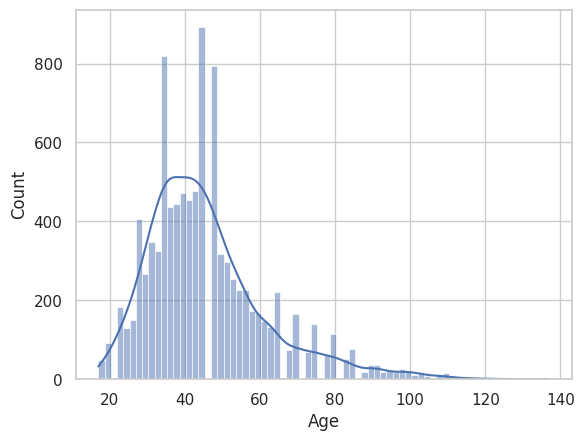

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.show()

**OBSERVATIONS**


*   Maximum customers are in the age range of 31-40 followed by the age Range of 40-50
*   There is a decline in number of customers as age increases


# Interlinking Age Analysis with Ministry of Statistics *'Demography of India over the years Visualisation'*

**Demography of India Over the years**<br>
Source: Ministry of Statistics and Programme Implementation

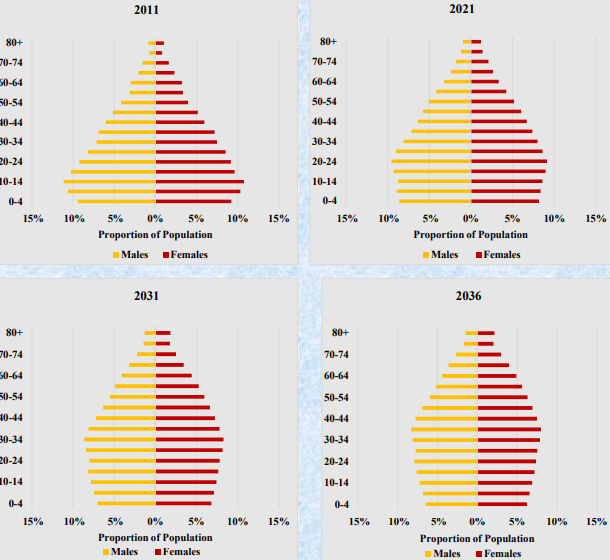

**ROAD AHEAD**
* With the support of government data ,it is observed that Indian population will continue to grow with greater share of working population according to demographical statistics
*So the trend in age of customers is expected to continue for the next ten years with greater share of working age population in the age group 30 to 50

## **Analysis of Geographical Location**

**Geographical Location of Customers**

In [ ]:
geo_types= df['Geography'].nunique()
print("Total Geographical locations:",geo_types)

Total Geographical locations: 3


**Tabulation of Geographical Location**

In [ ]:
from tabulate import tabulate
geo_types_counts = df['Geography'].value_counts()
geo_types_counts_df = pd.DataFrame({'Location': geo_types_counts.index, 'Number of Customers': geo_types_counts.values})
print(tabulate(geo_types_counts_df, headers='keys', tablefmt='psql'))

+----+------------+-----------------------+
|    | Location   |   Number of Customers |
|----+------------+-----------------------|
|  0 | Bengaluru  |                  4980 |
|  1 | Mumbai     |                  2492 |
|  2 | Delhi      |                  2455 |
+----+------------+-----------------------+


**Visualisation of Geographical location using Countplot**

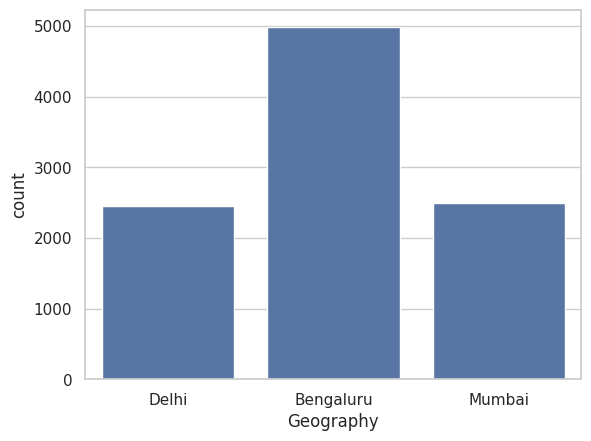

In [ ]:
sns.countplot(x='Geography', data=df)
plt.show()

**Observations**
* Bengaluru with a customer size of 4980 leads, it is followed by Mumbai(2492) and Delhi(2455)
* To observe future growth RBI statewise credit analysis over the years can be utilised

# Interlinking Geographical Location Analysis with RBI Region wise Credit Statistics

**IMPORTING RBI STATISTICS ON CREDIT AND HANDLING THE MISSING VALUES**

In [ ]:
rbi=pd.read_csv("/content/RBI Credit and Debit Statistics state wise over the years uLT(Table 1).csv")

In [ ]:
rbi.head()

,Unnamed: 0,S No.,Region/State/Union Territory,Deposit 2019,Deposit 2020,Deposit 2021,Deposit 2022,Deposit 2023,Deposit 2024,Credit 2019,Credit 2020,Credit 2021,Credit 2022,Credit 2023,Credit 2024,Average Credit,Rounded Average Credit
0,NaN,1,Goa,71135,76533,85771,92900,102038,112021,18803,19242,21038,24092,25566,29810,2.309183e+04,23091.83
1,NaN,2,Gujarat,674922,738912,830161,928468,1027453,1195365,532150,552428,580273,758868,734431,888934,6.745140e+05,674514.00
2,NaN,3,Maharashtra,2607845,2807751,3163108,3491988,3922908,4667847,2744200,2863779,2926015,2717399,3905707,4695201,3.308717e+06,3308716.83
3,NaN,4,Dadra & Nagar Haveli,3994,9979,11586,13210,14188,15655,2242,4458,4089,6766,5407,6900,4.977000e+03,4977.00
4,NaN,5,Daman & Diu,5055,-,-,-,-,-,1343,-,-,-,-,-,1.343000e+03,1343.00


In [ ]:
rbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    0 non-null      float64
 1   S No.                         37 non-null     int64  
 2   Region/State/Union Territory  37 non-null     object 
 3   Deposit 2019                  37 non-null     object 
 4   Deposit 2020                  37 non-null     object 
 5   Deposit 2021                  37 non-null     object 
 6   Deposit 2022                  37 non-null     object 
 7   Deposit 2023                  37 non-null     object 
 8   Deposit 2024                  37 non-null     object 
 9   Credit 2019                   37 non-null     object 
 10  Credit 2020                   37 non-null     object 
 11  Credit 2021                   37 non-null     object 
 12  Credit 2022                   37 non-null     object 
 13  Credit 

In [ ]:
rbi.isnull().sum()

,0
Unnamed: 0,37
S No.,0
Region/State/Union Territory,0
Deposit 2019,0
Deposit 2020,0
Deposit 2021,0
Deposit 2022,0
Deposit 2023,0
Deposit 2024,0
Credit 2019,0


In [ ]:
rbi = rbi.drop(['Unnamed: 0'], axis=1)

In [ ]:
rbi.head()

,S No.,Region/State/Union Territory,Deposit 2019,Deposit 2020,Deposit 2021,Deposit 2022,Deposit 2023,Deposit 2024,Credit 2019,Credit 2020,Credit 2021,Credit 2022,Credit 2023,Credit 2024,Average Credit,Rounded Average Credit
0,1,Goa,71135,76533,85771,92900,102038,112021,18803,19242,21038,24092,25566,29810,2.309183e+04,23091.83
1,2,Gujarat,674922,738912,830161,928468,1027453,1195365,532150,552428,580273,758868,734431,888934,6.745140e+05,674514.00
2,3,Maharashtra,2607845,2807751,3163108,3491988,3922908,4667847,2744200,2863779,2926015,2717399,3905707,4695201,3.308717e+06,3308716.83
3,4,Dadra & Nagar Haveli,3994,9979,11586,13210,14188,15655,2242,4458,4089,6766,5407,6900,4.977000e+03,4977.00
4,5,Daman & Diu,5055,-,-,-,-,-,1343,-,-,-,-,-,1.343000e+03,1343.00


In [ ]:
rbi = rbi.drop(['S No.'], axis=1)

In [ ]:
rbi.isnull().sum()

,0
Region/State/Union Territory,0
Deposit 2019,0
Deposit 2020,0
Deposit 2021,0
Deposit 2022,0
Deposit 2023,0
Deposit 2024,0
Credit 2019,0
Credit 2020,0
Credit 2021,0


In [ ]:
rbi = rbi.replace('-', 0)

In [ ]:
rbi.head()

,Region/State/Union Territory,Deposit 2019,Deposit 2020,Deposit 2021,Deposit 2022,Deposit 2023,Deposit 2024,Credit 2019,Credit 2020,Credit 2021,Credit 2022,Credit 2023,Credit 2024,Average Credit,Rounded Average Credit
0,Goa,71135,76533,85771,92900,102038,112021,18803,19242,21038,24092,25566,29810,2.309183e+04,23091.83
1,Gujarat,674922,738912,830161,928468,1027453,1195365,532150,552428,580273,758868,734431,888934,6.745140e+05,674514.00
2,Maharashtra,2607845,2807751,3163108,3491988,3922908,4667847,2744200,2863779,2926015,2717399,3905707,4695201,3.308717e+06,3308716.83
3,Dadra & Nagar Haveli,3994,9979,11586,13210,14188,15655,2242,4458,4089,6766,5407,6900,4.977000e+03,4977.00
4,Daman & Diu,5055,0,0,0,0,0,1343,0,0,0,0,0,1.343000e+03,1343.00


In [ ]:
states = ['Maharashtra', 'Karnataka', 'Delhi']

# Filtering the rows
selected_rows = rbi[rbi['Region/State/Union Territory'].isin(states)]

# Displaying the selected rows
print(selected_rows)

   Region/State/Union Territory Deposit 2019 Deposit 2020 Deposit 2021  \
2                   Maharashtra      2607845      2807751      3163108   
6                     Karnataka       934364      1061242      1256023   
18                        Delhi      1210108      1238245      1400864   

   Deposit 2022 Deposit 2023 Deposit 2024 Credit 2019 Credit 2020 Credit 2021  \
2       3491988      3922908      4667847     2744200     2863779     2926015   
6       1382552      1485253      1682411      651149      692032      750843   
18      1489930      1658866      1855609     1300026     1365110     1315663   

   Credit 2022 Credit 2023 Credit 2024  Average Credit  Rounded Average Credit  
2      2717399     3905707     4695201    3.308717e+06              3308716.83  
6       888922      958444     1160358    8.502913e+05               850291.33  
18     1425079     1496251     1680085    1.430369e+06              1430369.00  


**VISUALISATION OF RBI DATA**

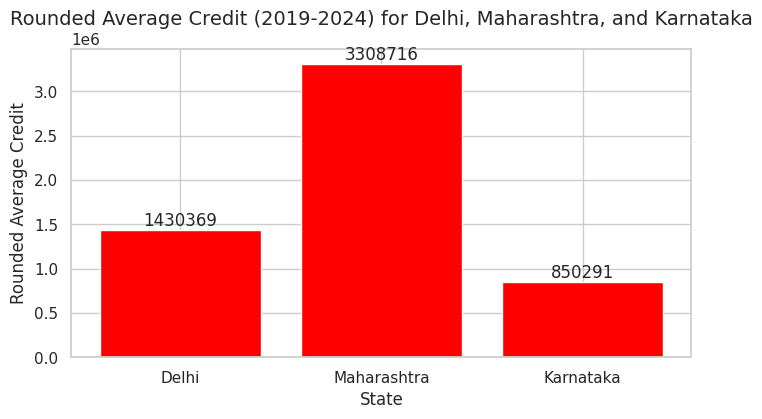

In [ ]:
data = {
    'State': ['Delhi', 'Maharashtra', 'Karnataka'],
    'Rounded Average Credit': [ 1430369.00, 3308716.83, 850291.33]  # Replace with actual values
}

rbi_avg = pd.DataFrame(data)

plt.figure(figsize=(8, 4))

plt.bar(rbi_avg['State'], rbi_avg['Rounded Average Credit'], color='red')

plt.title('Rounded Average Credit (2019-2024) for Delhi, Maharashtra, and Karnataka', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Rounded Average Credit', fontsize=12)

for index, value in enumerate(rbi_avg['Rounded Average Credit']):
    plt.text(index, value + 50000, str(int(value)), ha='center')

# Show the plot
plt.show()

**OBSERVATIONS**
* According RBI credit data statewise for Scheduled Commerical Bank Maharshtra tops followed by Delhi and Karnataka
* While in our data set Bengaluru(Karnataka) tops followed by Mumbai and Delhi in credit scores
* This signifies the immense potential to be unlocked in Maharshtra and Delhi in credit operations


In [ ]:
rbi_sorted = rbi.sort_values(by='Rounded Average Credit', ascending=False)

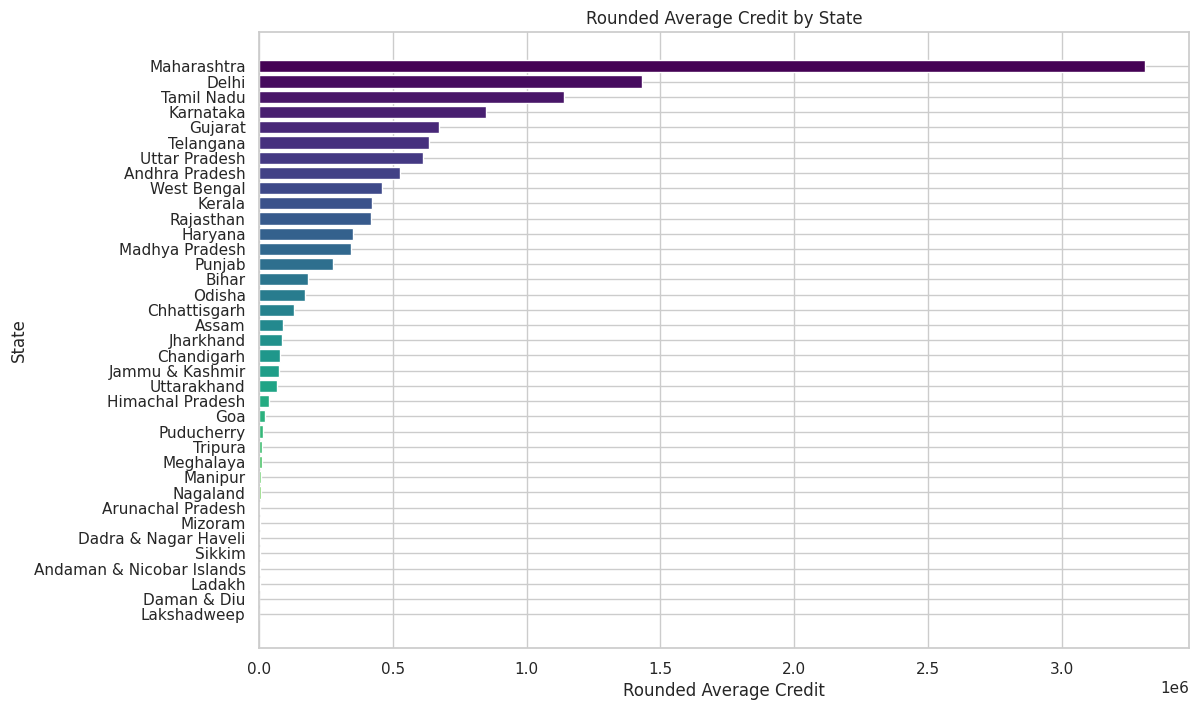

In [ ]:
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(rbi_sorted)))
plt.barh(rbi_sorted['Region/State/Union Territory'], rbi_sorted['Rounded Average Credit'], color=colors)
plt.xlabel('Rounded Average Credit')
plt.ylabel('State')
plt.title('Rounded Average Credit by State')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()

**Road Ahead**
* There is immense scope for expansion of operations in states like Tamil Nadu,Gujarat,Telangana,Uttar Pradesh

# **Analysis by Gender**

**Gender Type of Customers**

In [ ]:
gender_types= df['Gender'].nunique()
print("Total Gender Types:",gender_types)

Total Gender Types: 2


**Tabulation of Gender Type**

In [ ]:
from tabulate import tabulate
gender_types_counts = df['Gender'].value_counts()
gender_types_counts_df = pd.DataFrame({'Gender': gender_types_counts.index, 'Number of Customers': gender_types_counts.values})
print(tabulate(gender_types_counts_df, headers='keys', tablefmt='psql'))

+----+----------+-----------------------+
|    | Gender   |   Number of Customers |
|----+----------+-----------------------|
|  0 | Female   |                  5413 |
|  1 | Male     |                  4514 |
+----+----------+-----------------------+


**Visualisation of Gender Type(Pie Chart & Count Plot)**

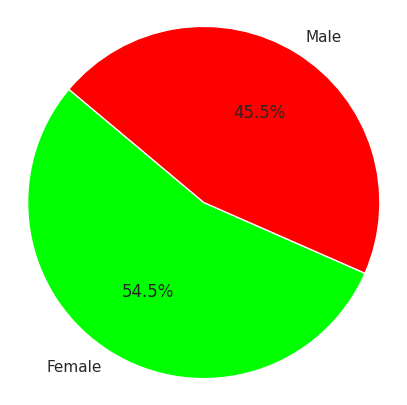

In [ ]:
labels = gender_types_counts.index
sizes = gender_types_counts.values
colors = ['#00FF00','#FF0000']
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.show()

**OBSERVATIONS**


*   The number of female customers is greater than number of male customers



# **Credit Score Analysis by Gender**

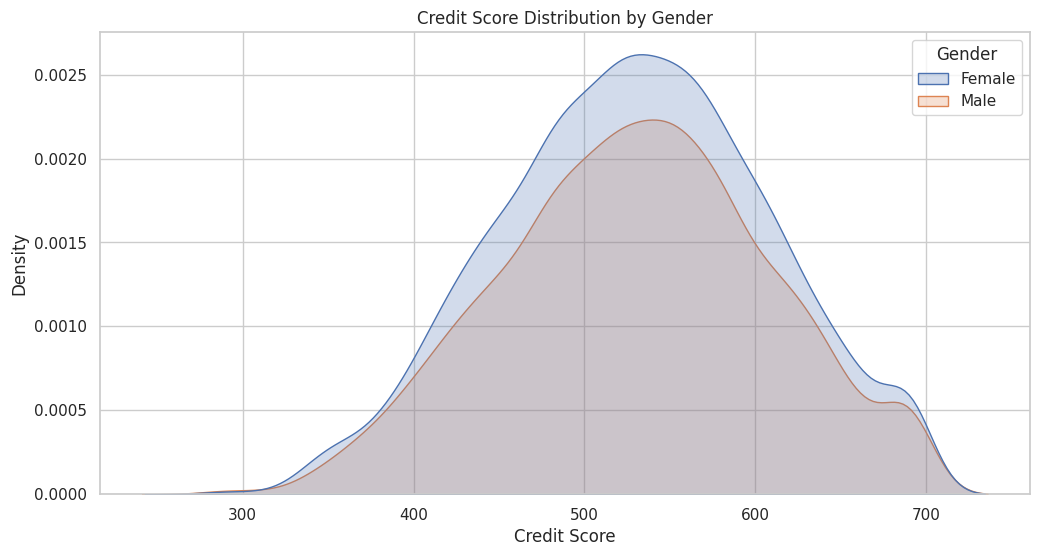

In [ ]:
# KDE Plot for Credit Score by Gender
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Credit Score', hue='Gender', fill=True)
plt.title('Credit Score Distribution by Gender')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.show()



**OBSERVATIONS**
* Higher Credit score rating is found in female customers than male customers
* On an economical level this can be linked to formalisation of women labor force
* On a societal level,this can be linked to increasing financial empowermwent of women which inturn operates a significant population to banking operations
* Increasing Government schemes like PM Jan Dhan Yojana,PM Mudra can be attributed to this improvement


# **Analysis of UPI Status of Customers**

In [ ]:
upi_counts = df['UPI Enabled'].value_counts()
upi_counts.index = ['UPI Not Enabled', 'UPI Enabled']
upi_counts_df = pd.DataFrame({'UPI Status': upi_counts.index, 'Number of Customers': upi_counts.values})
print(tabulate(upi_counts_df, headers='keys', tablefmt='psql'))

+----+-----------------+-----------------------+
|    | UPI Status      |   Number of Customers |
|----+-----------------+-----------------------|
|  0 | UPI Not Enabled |                  6998 |
|  1 | UPI Enabled     |                  2929 |
+----+-----------------+-----------------------+


In [ ]:
print(upi_counts)

UPI Not Enabled    6998
UPI Enabled        2929
Name: count, dtype: int64


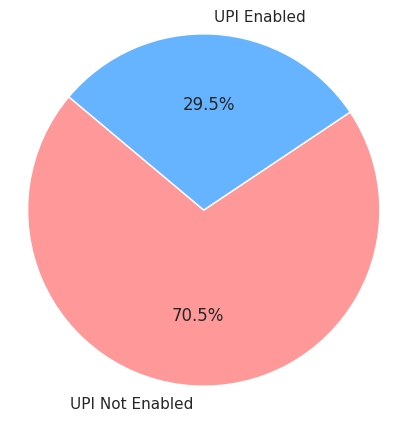

In [ ]:
labels = upi_counts.index
sizes = upi_counts.values
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.show()

**OBSERVATIONS**
* Large number of customers(6998) are not UPI enabled and only small portion(2929) customers are UPI enabled

# **UPI usage Based on Gender**

<Figure size 1000x600 with 0 Axes>

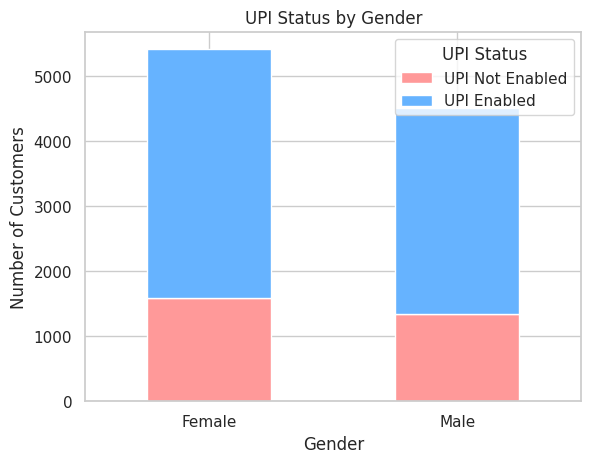

In [ ]:
upi_gender_counts = df.groupby(['Gender', 'UPI Enabled']).size().unstack(fill_value=0)
upi_gender_counts = upi_gender_counts.rename(columns={0: 'UPI Not Enabled', 1: 'UPI Enabled'})


plt.figure(figsize=(10, 6))
upi_gender_counts.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])
plt.title('UPI Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='UPI Status')
plt.xticks(rotation=0)
plt.show()

**OBSERVATIONS**
* A greater number of UPI enabled female customer is observed than male customers
* A greater number of UPI Not Enabled female customers are observed than male customers

# **Analysis of Income Range**

In [ ]:
bins = [0, 99999, 199999, 299999, 399999,499999,599999,699999]
labels = ['<1lakh', '1L-2L', '2L-3L', '3L-4L', '4L-5L','5L-6L','>6L']
income_range= pd.cut(df['Estimated Yearly Income'], bins=bins, labels=labels)

In [ ]:
income_range_counts = income_range.value_counts().sort_index()

**Tabulation of Income Range**

In [ ]:
income_range_counts_df = pd.DataFrame({'Estimated Yearly Income Range': income_range_counts.index, 'Number of Customers': income_range_counts.values})

In [ ]:
print(tabulate(income_range_counts_df, headers='keys', tablefmt='psql'))

+----+---------------------------------+-----------------------+
|    | Estimated Yearly Income Range   |   Number of Customers |
|----+---------------------------------+-----------------------|
|  0 | <1lakh                          |                  1782 |
|  1 | 1L-2L                           |                  1804 |
|  2 | 2L-3L                           |                  1871 |
|  3 | 3L-4L                           |                  1819 |
|  4 | 4L-5L                           |                  1788 |
|  5 | 5L-6L                           |                   863 |
|  6 | >6L                             |                     0 |
+----+---------------------------------+-----------------------+


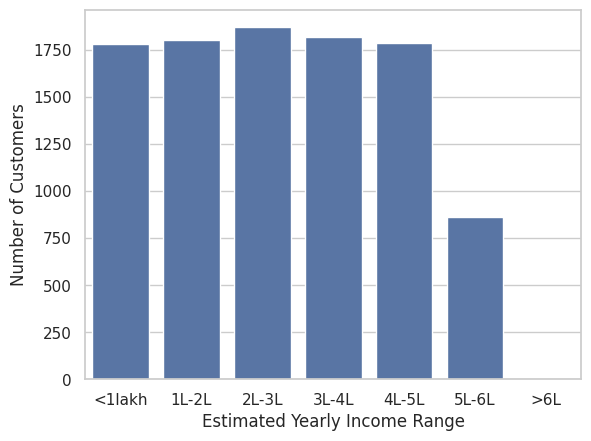

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Estimated Yearly Income Range", y="Number of Customers", data=income_range_counts_df)


# **Estimated Yearly Income Based on Gender**

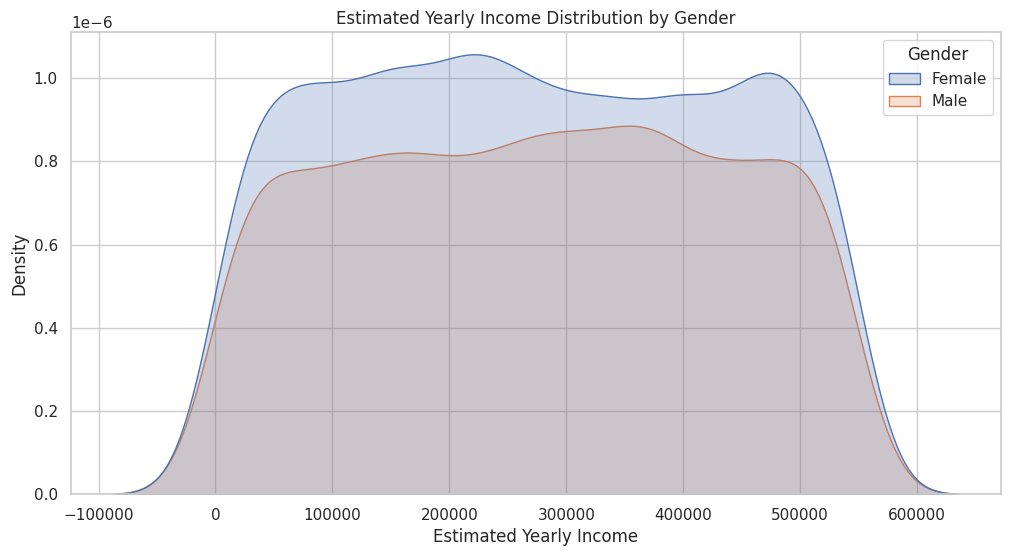

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Estimated Yearly Income', hue='Gender', fill=True)
plt.title('Estimated Yearly Income Distribution by Gender')
plt.xlabel('Estimated Yearly Income')
plt.ylabel('Density')
plt.show()

**OBSERVATIONS**
* More female customers are observed with higher yearly income than male customers

# **Analysis of Current Account of Customers**

In [ ]:
bins = [-1, 0, 99999, 199999, 299999, 399999, 499999, 599999, 699999, 799999, 899999, 999999, 1099999, 1199999, 1299999, 1399999, 1499999, 1599999, 1699999, 1799999, 1899999, 1999999, 2099999, 2199999, 2299999, 2399999, 2499999, 2599999, 2699999, 2799999, 2899999, 2999999, 3000000]
labels = ['0', '<1 lakh', '1L-2L', '2L-3L', '3L-4L', '4L-5L', '5L-6L', '6L-7L', '7L-8L', '8L-9L', '9L-10L', '10L-11L', '11L-12L', '12L-13L', '13L-14L', '14L-15L', '15L-16L', '16L-17L', '17L-18L', '18L-19L', '19L-20L', '20L-21L', '21L-22L', '22L-23L', '23L-24L', '24L-25L', '25L-26L', '26L-27L', '27L-28L', '28L-29L', '29L-30L', '30L']
ca_range= pd.cut(df['Current Account'], bins=bins, labels=labels)
ca_range_counts = ca_range.value_counts().sort_index()
ca_range_counts_df = pd.DataFrame({'Current Account Range': ca_range_counts.index, 'Number of Customers': ca_range_counts.values})
print(tabulate(ca_range_counts_df, headers='keys', tablefmt='psql'))


+----+-------------------------+-----------------------+
|    | Current Account Range   |   Number of Customers |
|----+-------------------------+-----------------------|
|  0 | 0                       |                  3600 |
|  1 | <1 lakh                 |                     3 |
|  2 | 1L-2L                   |                     3 |
|  3 | 2L-3L                   |                     9 |
|  4 | 3L-4L                   |                    25 |
|  5 | 4L-5L                   |                    36 |
|  6 | 5L-6L                   |                    59 |
|  7 | 6L-7L                   |                   105 |
|  8 | 7L-8L                   |                   132 |
|  9 | 8L-9L                   |                   196 |
| 10 | 9L-10L                  |                   270 |
| 11 | 10L-11L                 |                   303 |
| 12 | 11L-12L                 |                   400 |
| 13 | 12L-13L                 |                   472 |
| 14 | 13L-14L                 

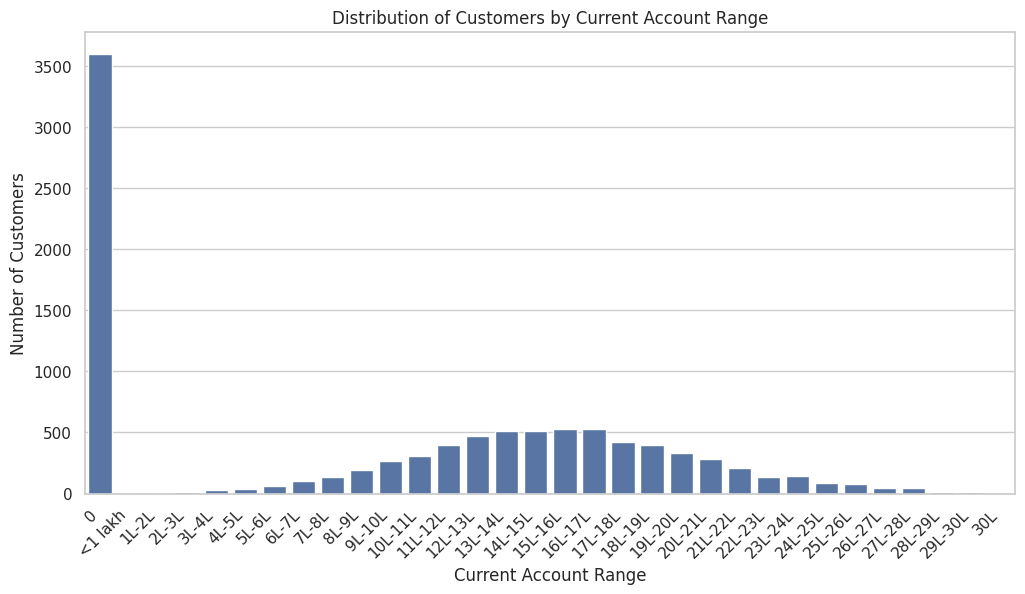

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Current Account Range", y="Number of Customers", data=ca_range_counts_df)
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Customers by Current Account Range")
plt.xlabel("Current Account Range")
plt.ylabel("Number of Customers")
plt.show()

**OBSERVATIONS**


*   There are large chunk of customers with zero balance accounts
*   Most customers fall into the current account range of 15 Lakh to 16 Lakh



# **Analysis of Closed accounts**

In [ ]:
closed_counts= df['Closed'].value_counts()
closed_counts.index = ['Not Closed', 'Closed']
closed_counts_df = pd.DataFrame({'Closed Status': closed_counts.index, 'Number of Customers': closed_counts.values})
print(tabulate(closed_counts_df, headers='keys', tablefmt='psql'))

+----+-----------------+-----------------------+
|    | Closed Status   |   Number of Customers |
|----+-----------------+-----------------------|
|  0 | Not Closed      |                  7899 |
|  1 | Closed          |                  2028 |
+----+-----------------+-----------------------+


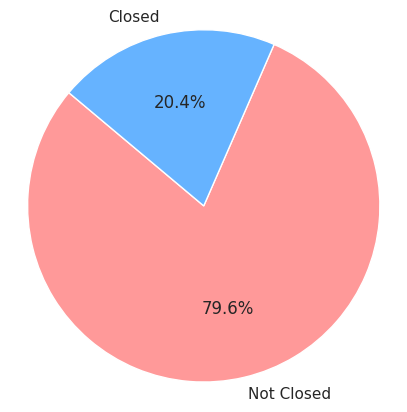

In [ ]:
labels =closed_counts.index
sizes = closed_counts.values
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.show()

**OBSERVATIONS**
* Around 80 percentage of customers are having active accounts
* While around 20perentage of customers are having closed accounts

**CUSTOMER CHURN RATE**
* Calculate the CCR by dividing the customers lost by the customers you had at the beginning. The lower the CCR is, the better your business will perform

In [ ]:
churn_rate=2028/(6998+2020)
print("Customer Churn Rate:",churn_rate)

Customer Churn Rate: 0.22488356620093147


**OBSERVATIONS**


*  The Customer churn rate is estimated to be 22.49 percent
*  This means that over 22.5percent of customers are discontonuing the service over the measured time period



# **Credit Score Analysis by Geographical Location**

In [ ]:
filtered_df = df.groupby('Geography').filter(lambda x: x['Credit Score'].count() >= 4)
geo_state = filtered_df.groupby('Geography')['Credit Score'].mean()
geo_state

,Credit Score
Geography,
Bengaluru,528.791365
Delhi,530.109165
Mumbai,530.178973


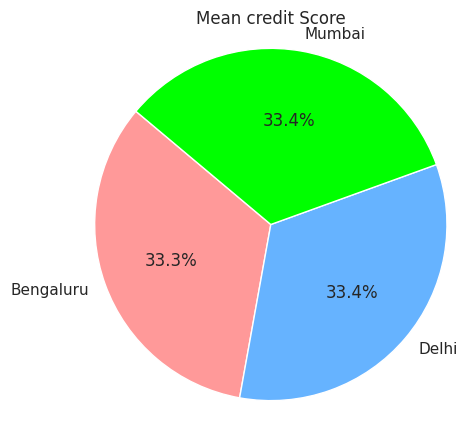

In [ ]:
labels = geo_state.index
sizes = geo_state.values
colors = ['#ff9999','#66b3ff','#00FF00']
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Mean credit Score")
plt.axis('equal')
plt.show()

**OBSERVATIONS**
* The mean credit score is almost similar in Bengaluru,Delhi and  Mumbai

# **Identifying the outliers**

**BOX PLOT BETWEEN GEOGRAPHICAL LOCATION AND CREDIT SCORE**

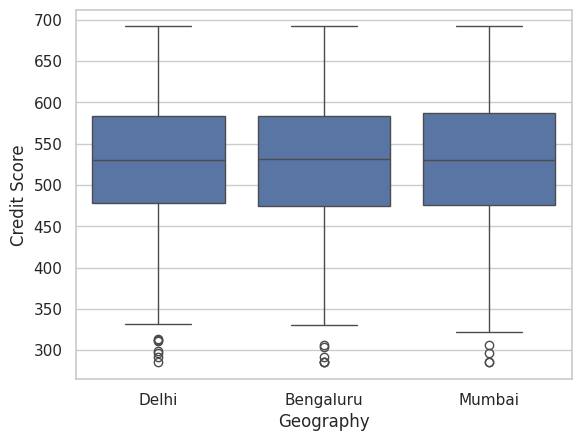

In [ ]:
sns.boxplot(x='Geography', y='Credit Score', data=df)
plt.show()

**OBSERVATIONS**
* The median credit score for all three cities appears similar, around 550.
* The IQR for all cities is similar, with the boxes representing scores between roughly 500 and 600.
*  There are **multiple outliers below 350 in all three cities, indicating that some individuals have much lower credit scores compared to the majority.**
* The overall credit score range (from minimum to maximum) is consistent across the cities, extending from about 300 to 700.




**BOX PLOT OF CREDIT SCORE AND AGE RANGE**

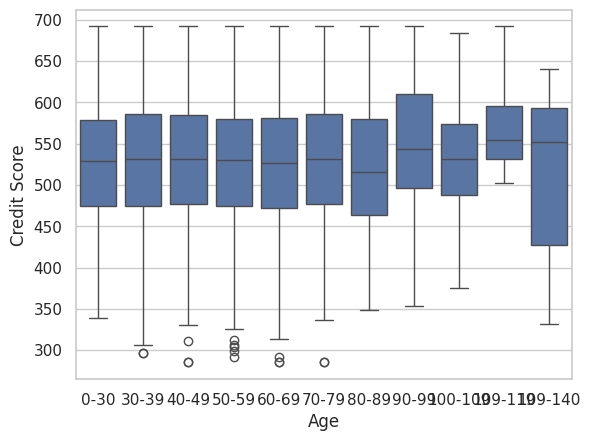

In [ ]:
sns.boxplot(x=age_range, y='Credit Score', data=df)
plt.show()

**OBSERVATIONS**
* There are more outliers below 350 in younger age groups (0-30, 30-39, 40-49) compared to older groups, indicating that a small number of young individuals have significantly lower credit scores.
* Age groups between 90–99 and 100–109 show a noticeable increase in both median and upper credit scores compared to younger age groups.
* Median credit score remains relatively stable across the age groups, hovering around 550 for most.
* The interquartile range (IQR) is fairly consistent across most age groups, with scores generally falling between 500 and 600.


**HeatMap of Geographical Location with popup containing Average Credit Score**

In [ ]:
import folium
from folium.plugins import HeatMap

city_to_coords = {
    'Delhi': [28.7041, 77.1025],
    'Bengaluru': [12.9716, 77.5946],
    'Mumbai': [19.0760, 72.8777],
}

df['Latitude'] = df['Geography'].map(lambda x: city_to_coords[x][0])
df['Longitude'] = df['Geography'].map(lambda x: city_to_coords[x][1])

map_india = folium.Map(location=[20.5937, 78.9629], zoom_start=5.2, scrollWheelZoom=False)


for city, avg_score in geo_state.items():
    if city in city_to_coords:
        folium.Marker(
            location=city_to_coords[city],
            popup=f"{city}<br>Average Credit Score: {avg_score:.2f}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(map_india)

# Prepare data for HeatMap and add HeatMap layer
heat_data = df[['Latitude', 'Longitude', 'Credit Score']].values.tolist()
HeatMap(heat_data, radius=10).add_to(map_india)

# Display the map
map_india

# **Machine Learning to Obtain User Exit Prediction**

**Predictive Modelling of Customer Churn**

Creation of dummies for Geography', 'Gender', 'UPI Enabled' which conatin string Values to convert it into binary form

In [ ]:
df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)
df['Geography'].fillna('Unknown', inplace=True)

# Encode categorical variables
df_ml = pd.get_dummies(df, columns=['Geography', 'Gender', 'UPI Enabled'], drop_first=True)

In [ ]:
print(df_ml.columns)

Index(['Credit Score', 'Age', 'Customer Since', 'Current Account',
       'Num of products', 'Estimated Yearly Income', 'Closed', 'Latitude',
       'Longitude', 'Geography_Delhi', 'Geography_Mumbai', 'Gender_Male',
       'UPI Enabled_1.0'],
      dtype='object')


**Correct column names**

In [ ]:
X = df_ml[['Credit Score', 'Age', 'Estimated Yearly Income',
        'Geography_Delhi', 'Geography_Mumbai',
        'Gender_Male', 'UPI Enabled_1.0']]
y = df_ml['Closed']

**Split the data into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Initialisation,Training and Evaluation of each Model**

In [ ]:
models = {'Logistic Regression': LogisticRegression(),'Random Forest': RandomForestClassifier(), 'Gradient Boosting': GradientBoostingClassifier()}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    print("\n")

Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87      2369
         1.0       0.26      0.05      0.08       610

    accuracy                           0.78      2979
   macro avg       0.53      0.51      0.48      2979
weighted avg       0.69      0.78      0.71      2979

ROC AUC Score: 0.669033070604599


Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      2369
         1.0       0.54      0.30      0.39       610

    accuracy                           0.80      2979
   macro avg       0.69      0.62      0.64      2979
weighted avg       0.78      0.80      0.78      2979

ROC AUC Score: 0.7360465438138801


Model: Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      2369
         1.0       0.61 

**OBSERVATIONS**<br>
**LOGISTIC REGRESSION**<br>
**Class 0 (Non-exiting users):**
* Precision: 0.80 – Out of all the users predicted as non-exiting (class 0), 80% were correctly classified.
* Recall: 0.96 – Out of all actual non-exiting users, 96% were correctly identified by the model.
* F1-score: 0.87 – This is the harmonic mean of precision and recall, indicating a good balance between the two.
* Support: 2369 – This is the number of actual non-exiting users in the dataset.<br>

**Class 1 (Exiting users):**<br>
* Precision: 0.26 – Only 26% of the users predicted as exiting (class 1) were actually exiting.<br>
* Recall: 0.05 – The model is detecting only 5% of the actual exiting users.
* F1-score: 0.08 – The low F1 score indicates poor performance in predicting exiting users.
* Support: 610 – This is the number of actual exiting users in the dataset<br>


 **Overall Model Performance** <br>
* The **Accuracy of the Model is 78 percentage**
* The model performs well for non-exiting users (class 0), but poorly for exiting users (class 1).

---------------------------------------------------------------------
**RANDOM FOREST**<br>
**Class 0 (Non-exiting users):**<BR>
* Precision: 0.84 – Out of all predicted non-exiting users, 84% were correctly classified.<br>
* Recall: 0.93 – The model correctly identified 93% of the actual non-exiting users.<br>
* F1-score: 0.88 – A strong balance between precision and recall for non-exiting users.<br>
* Support: 2369 – The number of actual non-exiting users.<br>

**Class 1 (Exiting users):**<br>
* Precision: 0.52 – Out of all predicted exiting users, 52% were correctly classified.
* Recall: 0.30 – The model correctly identified 30% of actual exiting users (an improvement from Logistic Regression’s 5%).
* F1-score: 0.38 – Better than the Logistic Regression model, but still relatively low for the exiting class.
* Support: 610 – The number of actual exiting users.


 **Overall Model Performance** <br>
* The **Accuracy of the Model is 80 percentage**
* ROC AUC Score of 0.73 shows that model can distinguish between exiting and non exiting users more accurately than random chance
-------------------------------------------------------------------
**Gradient Boosting** <br>
**Class 0 (Non-exiting users):**<br>
* Precision: 0.84 – Out of all predicted non-exiting users, 84% were correctly classified.<br>
* Recall: 0.95 – The model identified 95% of actual non-exiting users.<br>
* F1-score: 0.89 – A very strong balance between precision and recall for non-exiting users.<br>
* Support: 2369 – The number of actual non-exiting users.<br>

**Class 1 (Exiting users):**<br>
* Precision: 0.61 – Out of all predicted exiting users, 61% were correct (a good improvement from previous models).
* Recall: 0.32 – The model identified 32% of actual exiting users (better than Random Forest but still low).
* F1-score: 0.42 – Improved from previous models, indicating a better * balance between precision and recall for exiting users.
Support: 610 – The number of actual exiting users<br>

**Overall Model Performance**<br>
* The **Accuracy of the Model is 82 percentage**
* ROC AUC Score of 0.77 shows that model can distinguish between the two classes



**FEATURE IMPORTANCE OF RANDOM FOREST**

In [ ]:
importances = models['Random Forest'].feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                   Feature  Importance
2  Estimated Yearly Income    0.324087
1                      Age    0.307359
0             Credit Score    0.299809
4         Geography_Mumbai    0.028419
5              Gender_Male    0.016713
6          UPI Enabled_1.0    0.014977
3          Geography_Delhi    0.008637


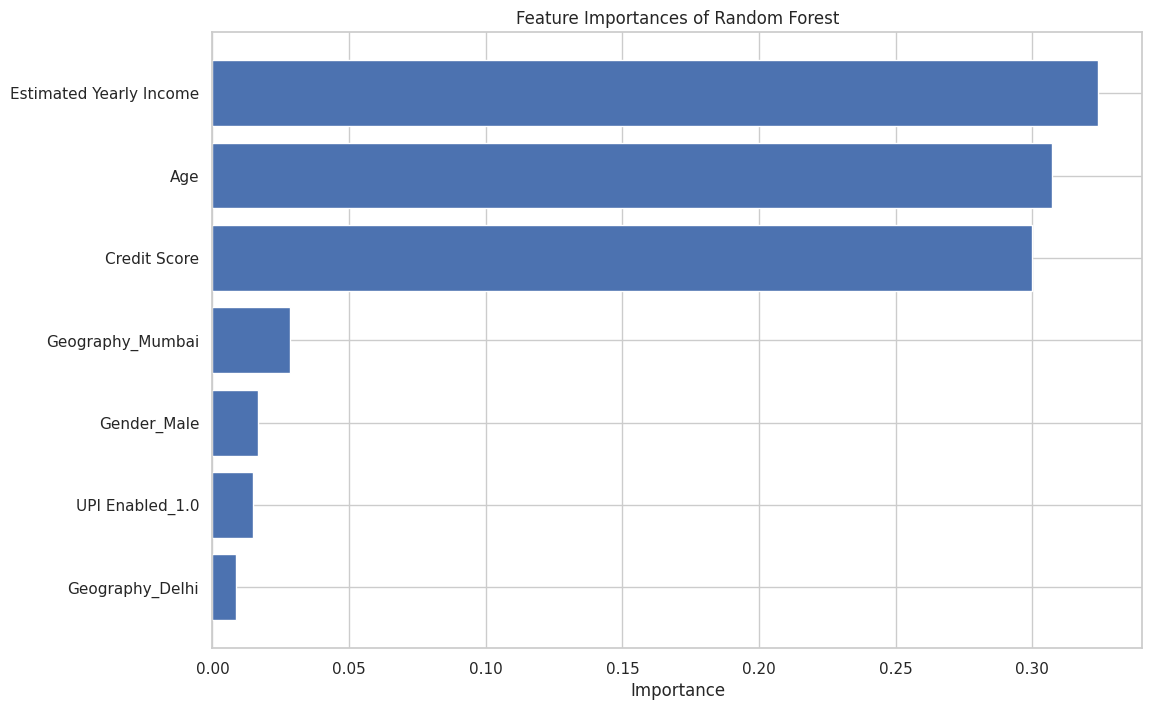

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances of Random Forest')
plt.gca().invert_yaxis()
plt.show()

**FEATURE IMPORTANCE OF GRADIENT BOOSTING**

In [ ]:
importances_gb = models['Gradient Boosting'].feature_importances_
features_gb = X.columns
importance_gb_df = pd.DataFrame({'Feature': features_gb, 'Importance': importances_gb})
importance_gb_df = importance_gb_df.sort_values(by='Importance', ascending=False)

print(importance_gb_df)

                   Feature  Importance
1                      Age    0.674289
4         Geography_Mumbai    0.107559
2  Estimated Yearly Income    0.096074
0             Credit Score    0.076305
5              Gender_Male    0.039221
3          Geography_Delhi    0.004797
6          UPI Enabled_1.0    0.001755


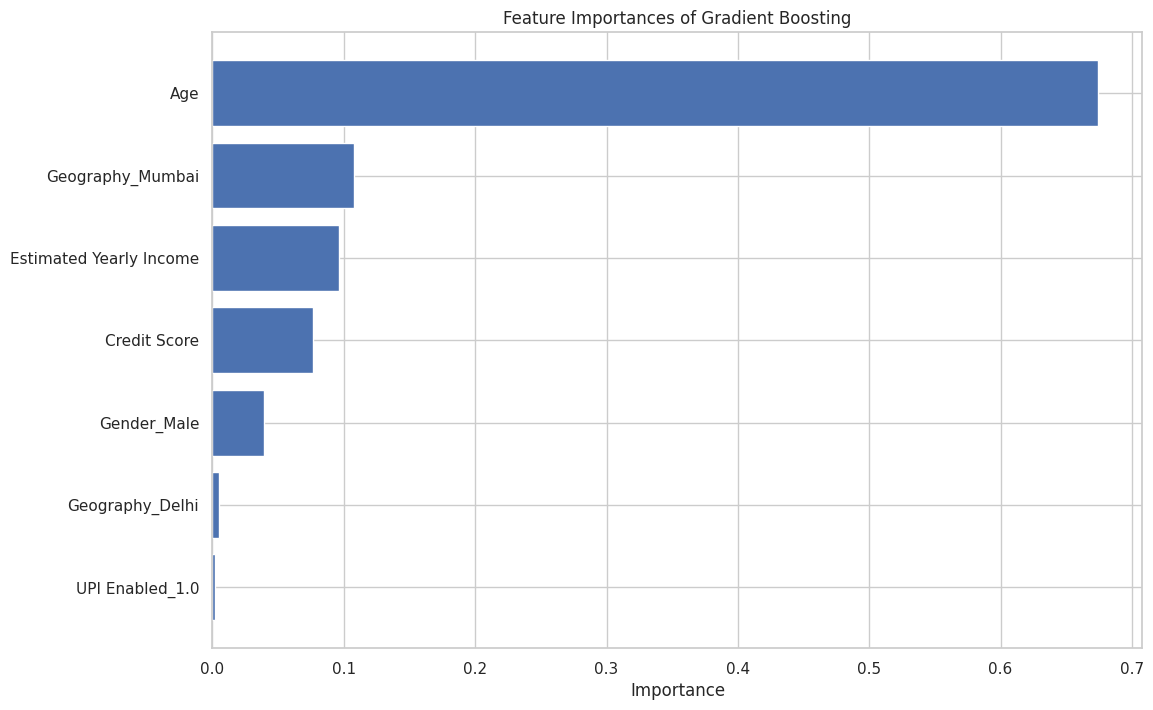

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(importance_gb_df['Feature'], importance_gb_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances of Gradient Boosting')
plt.gca().invert_yaxis()
plt.show()

**ANALYSIS OF FEATURE IMPORTANCE OF GRADIENT BOOSTING**

**1.AGE**



**Comparison of Age group and Closed Counts**

**Tabulation**

In [ ]:
print(df.groupby('Age')['Closed'].sum())

Age
17.0      2.0
18.0      1.0
19.0      2.0
20.0      2.0
22.0     12.0
         ... 
120.0     0.0
121.0     1.0
123.0     0.0
129.0     0.0
137.0     0.0
Name: Closed, Length: 70, dtype: float64


In [ ]:
age_closed = df.groupby(age_range)['Closed'].sum()
age_closed_df = pd.DataFrame({'Age Range': age_closed.index, 'Closed': age_closed.values})
from tabulate import tabulate
print(tabulate(age_closed_df, headers='keys', tablefmt='psql'))

+----+-------------+----------+
|    | Age Range   |   Closed |
|----+-------------+----------|
|  0 | 0-30        |       71 |
|  1 | 30-39       |      273 |
|  2 | 40-49       |      407 |
|  3 | 50-59       |      572 |
|  4 | 60-69       |      366 |
|  5 | 70-79       |      224 |
|  6 | 80-89       |       87 |
|  7 | 90-99       |       24 |
|  8 | 100-109     |        3 |
|  9 | 109-119     |        0 |
| 10 | 109-140     |        1 |
+----+-------------+----------+


<ipython-input-200-4b9f043b7c8c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_closed = df.groupby(age_range)['Closed'].sum()


**Visualisation**

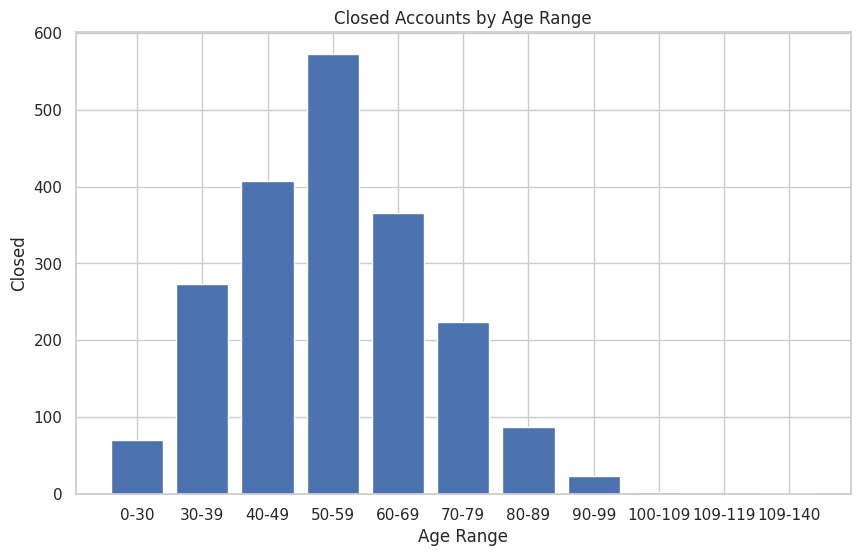

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(age_closed_df['Age Range'], age_closed_df['Closed'])
plt.xlabel('Age Range')
plt.ylabel('Closed')
plt.title('Closed Accounts by Age Range')
plt.show()

**OBSERVATIONS**
* Maximum User Exit Occurs in the age group of 50 to 60
*This is the decade before retirement in general where customer is inclined on repayment of outstanding dues
* The number of closed accounts decreases after age 60

**2.Geography_Mumbai**

In [ ]:
#Comparison of Geography and Closed counts

**Tabulation**

In [ ]:
filtered_df = df[df['Geography'].isin(['Mumbai', 'Delhi', 'Bengaluru'])]
geo_closed = filtered_df.groupby('Geography')['Closed'].sum()
geo_closed_df = pd.DataFrame({'Geography': geo_closed.index, 'Closed': geo_closed.values})
from tabulate import tabulate
print(tabulate(geo_closed_df, headers='keys', tablefmt='psql'))

+----+-------------+----------+
|    | Geography   |   Closed |
|----+-------------+----------|
|  0 | Bengaluru   |      808 |
|  1 | Delhi       |      412 |
|  2 | Mumbai      |      808 |
+----+-------------+----------+


**Visualisation**

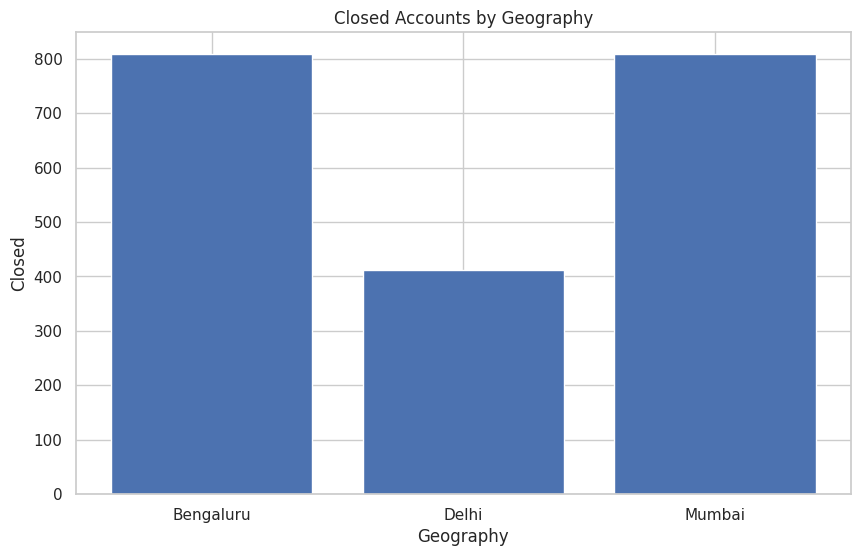

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(geo_closed_df['Geography'], geo_closed_df['Closed'])
plt.xlabel('Geography')
plt.ylabel('Closed')
plt.title('Closed Accounts by Geography')
plt.show()

**OBSERVATIONS**

*   Mumbai and Bengaluru have high customer exit
*   Various schemes should be introduced in these regions to increase customer retention in these regions



**3.Yearly Income Range**

Comparison of yearly income range and Closed Counts

In [ ]:
income_closed = df.groupby(income_range)['Closed'].sum()
income_closed_df = pd.DataFrame({'Income Range': income_closed.index, 'Closed': income_closed.values})
from tabulate import tabulate
print(tabulate(income_closed_df, headers='keys', tablefmt='psql'))

+----+----------------+----------+
|    | Income Range   |   Closed |
|----+----------------+----------|
|  0 | <1lakh         |      369 |
|  1 | 1L-2L          |      359 |
|  2 | 2L-3L          |      361 |
|  3 | 3L-4L          |      369 |
|  4 | 4L-5L          |      386 |
|  5 | 5L-6L          |      184 |
|  6 | >6L            |        0 |
+----+----------------+----------+


<ipython-input-208-dcbc0f7434d6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_closed = df.groupby(income_range)['Closed'].sum()


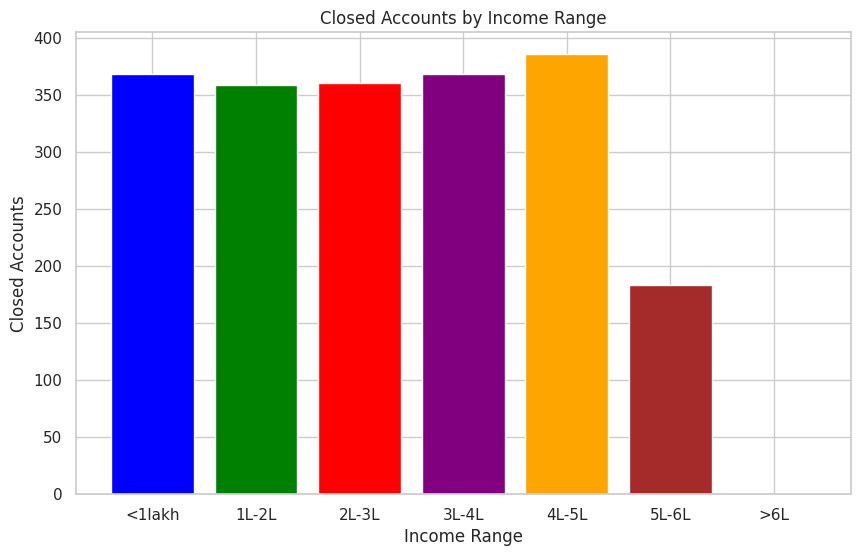

In [ ]:
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink']
plt.bar(income_closed_df['Income Range'], income_closed_df['Closed'], color=colors)
plt.xlabel('Income Range')
plt.ylabel('Closed Accounts')
plt.title('Closed Accounts by Income Range')
plt.show()

**OBSERVATIONS**
*  Maximum Closed counts are in between 4 Lakh to 5 Lakh
* As income range increases closed count is decreasing
* Greater than 6 lakh closed count is 0
* This shows that there is less customer exit in Higher Income Bracket

# CONCLUSION (in brief)
* **CREDIT SCORE**-Most customers have fair or poor credit scores mainly due to economic factors like inflation and cost of living
* **AGE** -Majority of Customers are in the 30-50 age range
*  **Interlinking with External Datasets**-
The Periodic Labour Force Survey of 2022 indicates a decline in urban unemployment, suggesting potential improvement in customer credit scores.
The Ministry of Statistics' demographic data can be used to understand customer age trends.
* **Customer Churn Rate** - Around 22percent of total customers exit.Customer retention can be improved by bringing new benfit schemes for payment cards etc
* **UPI Enabled Status** - Around 70percent of customers do not have their UPI Enabled.This also signifies a ned for digital empowerment to bridge the digital divide at the economical level
* **Gender** - Majority of women are economically empowered tahn men among customers
* **Machine Learning** - Gradient Boosting model offers greater accuracy among the models.Age,Years Income and Geography_mumbai are considered to be significant factors whose values effect the customer exit prediction

